In [ ]:
!pip install gym
!pip install python-opengl
!pip install xvfb

In [ ]:
!pip install gym['toytext']
# !pip install pyvirtualdisplay
# !pip install piglet

To activate virtual display we need to run a script once for training an agent, as follows

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size= (1400,900))
display.start()

In [ ]:
# This code creates a virtual display to draw game images on.
# If you are running locally, just ignore it.
import os

if not isinstance(os.environ.get("DISPLAY"), str) or len(os.environ.get("DISPLAY")) == 0:
    os.system("Xvfb :1 -screen 0 1024x768x24 &")
    os.environ['DISPLAY'] = ':1'

In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers.record_video import RecordVideo
gymlogger.set_level(40)

# error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

Utility functions to enable video recording of gym
environment and displaying it.
To enable video, just do "env = wrap_env(env)""

In [ ]:
import glob
import io
import base64
from IPython.display import display, HTML

def show_video():
    mp4list = glob.glob('video/*.mp4')

    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video).decode('ascii')

        display(HTML(data='''
            <video alt="test" autoplay loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
            </video>
        '''.format(encoded)))
    else:
        print("No MP4 files found in the 'video' directory.")

def wrap_env(env):
    env = RecordVideo(env, './video')
    return env

Observation space: The information the AI agent receives about the current state of the game, including the player's current hand, the dealer's visible card, and whether the player has a usable ace.

Action space: The possible moves the agent can make, such as hitting (requesting another card), standing (keeping the current hand), or doubling down.

observation space: Tuple(Discrete(32), Discrete(11), Discrete(2))
action space: Discrete(2)
initial observation: (8, 10, False)
action: 0

next observation: (8, 10, False)
reward: 1.0
done: True
info: {'TimeLimit.truncated': False}


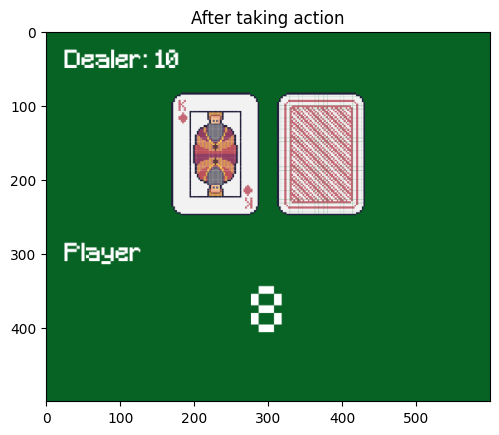

In [ ]:
env = gym.make("Blackjack-v1")

# env = wrap_env(env)  # If wrap_env is a custom function, make sure to define it

print('observation space:', env.observation_space)
print('action space:', env.action_space)

obs = env.reset()
print('initial observation:', obs)

action = env.action_space.sample()  # take a random action
print("action:", action)

obs, r, done, info = env.step(action)

print('\nnext observation:', obs)
print('reward:', r)
print('done:', done)
print('info:', info)

plt.title("After taking action")
plt.imshow(env.render('rgb_array'))
plt.show()

In [ ]:
def play_random_actions(env, num_episodes=10):
    total_rewards = 0

    for episode in range(num_episodes):
        state = env.reset()
        episode_reward = 0

        while True:
            action = env.action_space.sample()  # Take a random action
            next_state, reward, done, _ = env.step(action)

            episode_reward += reward

            if done:
                total_rewards += episode_reward
                print(f"Episode {episode + 1}, Total Reward: {episode_reward}")
                break

    print(f"Average Total Reward over {num_episodes} episodes: {total_rewards / num_episodes}")

if __name__ == "__main__":
    env = gym.make('Blackjack-v1')
    play_random_actions(env, num_episodes=10)

Episode 1, Total Reward: -1.0
Episode 2, Total Reward: -1.0
Episode 3, Total Reward: -1.0
Episode 4, Total Reward: 1.0
Episode 5, Total Reward: 1.0
Episode 6, Total Reward: -1.0
Episode 7, Total Reward: -1.0
Episode 8, Total Reward: 1.0
Episode 9, Total Reward: -1.0
Episode 10, Total Reward: -1.0
Average Total Reward over 10 episodes: -0.4


In [ ]:
def simulate_episodes(env, num_episodes):
    total_rewards = 0

    for episode in range(num_episodes):
        state = env.reset()
        done = False

        while not done:
            action = env.action_space.sample()  # Random action for illustration, replace with your own agent's action
            next_state, reward, done, _ = env.step(action)
            total_rewards += reward

    average_reward = total_rewards / num_episodes
    return average_reward

#Set the number of episodes for simulation
num_episodes = 1000

# Simulate episodes and calculate the average total reward
average_reward = simulate_episodes(env, num_episodes)

print(f'Average Total Reward over {num_episodes} episodes: {average_reward}')

Average Total Reward over 1000 episodes: -0.366


If your cards in a game like blackjack add up to a small total, like less than 12, it's usually a good idea to take another card to try and make your hand better. On the other hand, if your total is already high, like 17 or more, it's usually better to keep your current hand and not take any more cards. Of course, you might want to consider the dealer's face-up card before making your decision.